# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

In [1]:
import os
import pandas as pd
import numpy as np

## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

In [2]:
# set the random seed
random_seed = 42

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [3]:
# Read in the training data and targets files
train = pd.read_csv(training_data_path)
targets = pd.read_csv(training_targets_path)

train_targets = train.join(targets)
train_targets

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,59.000000,30,404.300000,33975,8251,20.5,0.000000,51.3,50.8,51.9,...,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436,199.5
1,114.000000,41,403.800000,47363,22702,13.8,0.000000,40.8,39.8,42.7,...,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661,137.1
2,33.000000,11,352.000000,77222,9899,6.8,0.000000,38.1,36.9,39.8,...,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130,126.9
3,254.000000,100,429.600000,80650,48904,7.5,0.000000,43.5,42.7,44.1,...,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462,173.8
4,75.000000,32,407.500000,42839,22255,14.6,0.000000,31.1,30.2,31.6,...,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469,179.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,335.000000,155,445.700000,41608,61109,17.5,32.728403,41.2,39.8,42.0,...,42.4,42.6,23.4,95.398451,2.154399,0.448024,0.106749,49.736708,5.379260,201.5
2434,113.000000,37,497.300000,61259,17299,9.0,0.000000,45.9,44.9,47.3,...,43.6,34.8,19.9,92.609104,3.320038,0.786016,0.997184,53.404362,3.227666,160.0
2435,571.000000,210,457.200000,49790,118212,12.6,676.750245,35.4,34.5,36.3,...,56.5,28.6,13.7,91.484690,1.389174,4.463981,0.651015,47.707412,4.937288,160.0
2436,1962.667684,7,453.549422,50886,2640,10.4,0.000000,47.4,45.3,50.1,...,35.1,32.3,12.6,96.892139,0.987203,0.548446,0.146252,62.436975,8.951965,136.2


In [4]:
# check for duplicates
train_targets.duplicated().sum()

0

In [5]:
# check for missing values
train_targets.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
TARGET_d

'\n- median age has some extreme, unrealistic values: not the scale of the histogram, in at least one county the median age exceeds 500 years\n- \n'

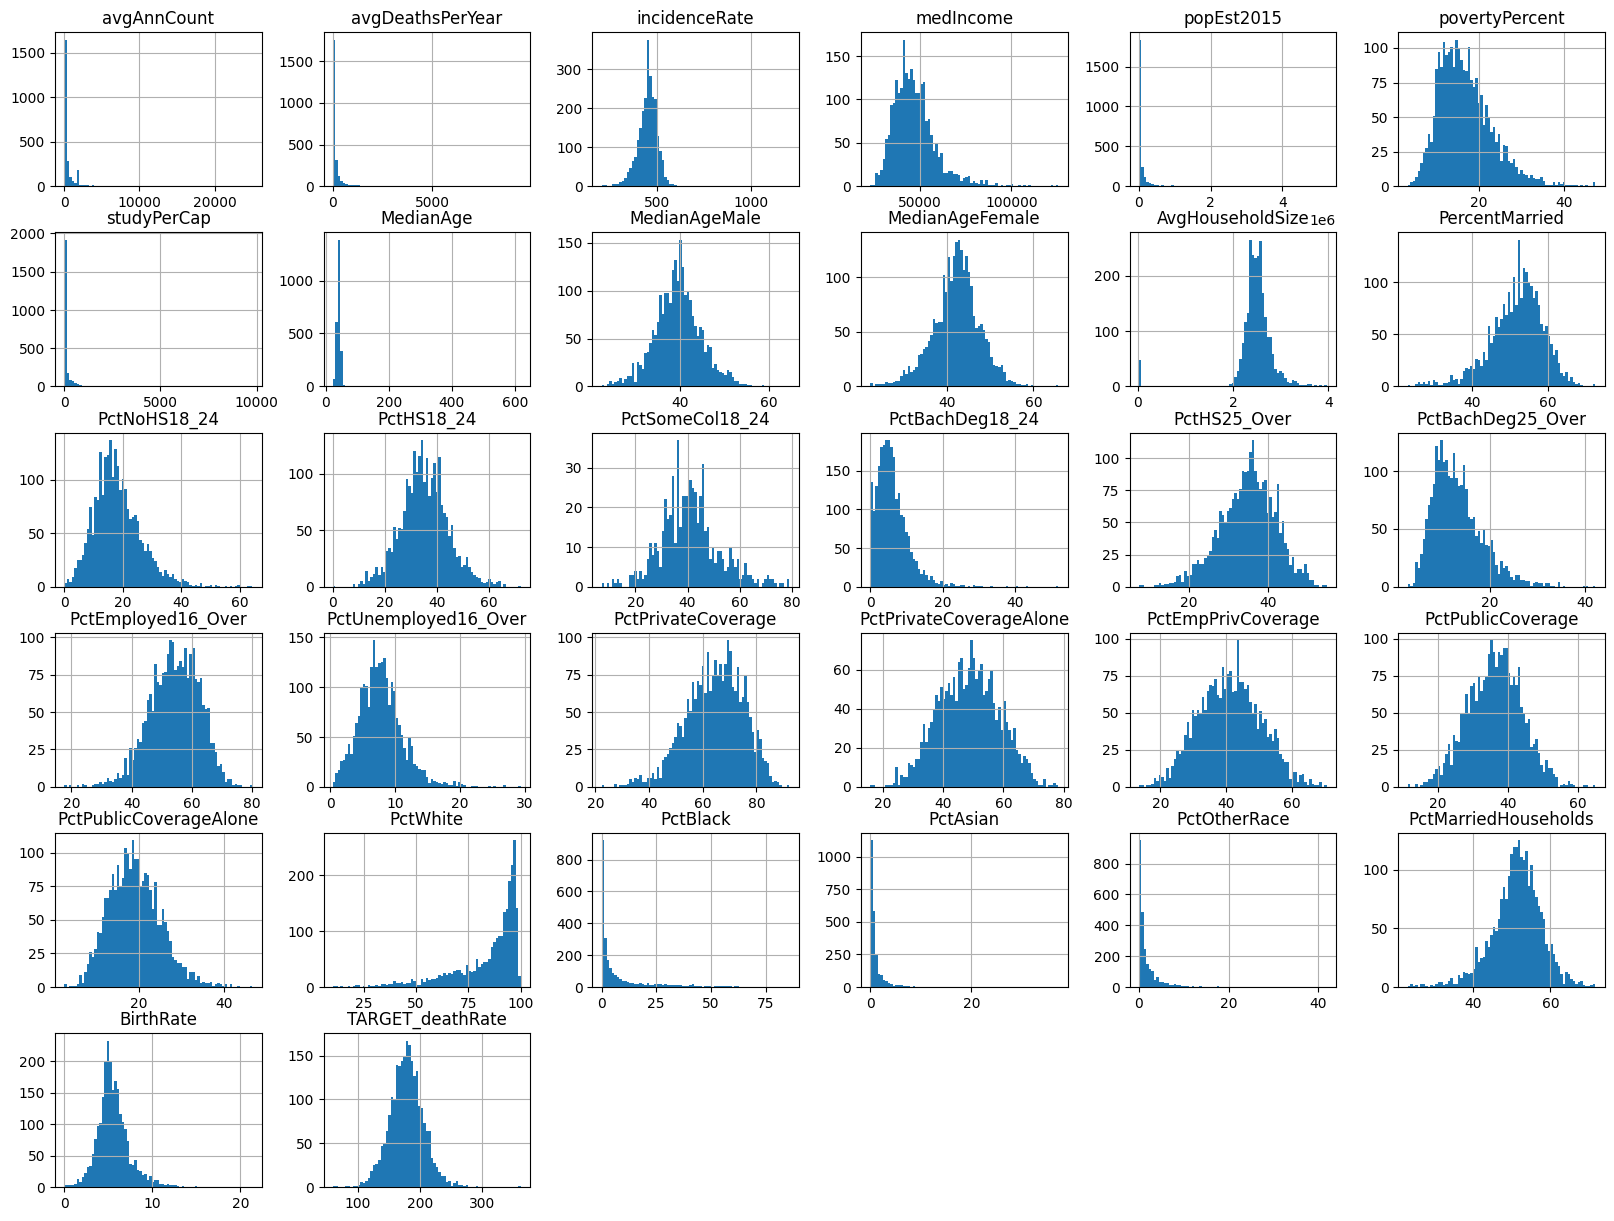

In [4]:
# Plot histograms of all features to visualise their distributions and identify outliers

%matplotlib inline
import matplotlib.pyplot as plt

train_targets.hist(bins=75, figsize=(20,15))

"""
- 
- 
"""

### Observations:
- median age has some extreme, unrealistic values: not the scale of the histogram, in at least one county the median age exceeds 500 years

In [ ]:
# Compute correlations of all features with the target variable (across the data set) 
# and sort them according the strength of correlations

corr = train_targets.corr().abs()
corr_TARGET = corr["TARGET_deathRate"].sort_values(ascending=False)
print(corr_TARGET)

In [ ]:
# Which are the top five features with strongest correlations to the targets?
top5 = corr_TARGET.drop("TARGET_deathRate").nlargest(n=5)
print(top5)

In [ ]:
# Plot these correlations using the scatter matrix plotting function available in pandas and 
# comment on at least two sets of features that show visible correlations to each other

from pandas.plotting import scatter_matrix

attr = top5.index
scatter_matrix(train_targets[attr], figsize=(12,8))

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [6]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")

In [7]:
# Remove features with too much missing data
train_targets.drop(['PctSomeCol18_24', 'PctPrivateCoverageAlone'],axis=1,inplace=True)

In [10]:
# Split train_targets into features and targets
features = train_targets.drop("TARGET_deathRate",axis=1)
targets = train_targets["TARGET_deathRate"].copy()

In [8]:
# Create Pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [9]:
# Apply pipeline to features
features_prepared = pipeline.fit_transform(features)

In [11]:
# Split into train and test sets
from sklearn.model_selection import train_test_split as tts

feature_train, feature_test, target_train, target_test = tts(features_prepared, targets, test_size=0.2, random_state=random_seed)

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [13]:
lin_reg=linear_model.LinearRegression()
lin_reg.fit(feature_train, target_train)

lin_target_predict = lin_reg.predict(feature_test)

ols_comp = pd.DataFrame({
    'Actual' : target_test,
    'Predicted' : lin_target_predict
})

print("Predicted vs. Actual for Linear Regressor", "\n", ols_comp.sample(10,random_state=random_seed))

lin_mse=mean_squared_error(target_test, lin_target_predict)
lin_rmse=np.sqrt(lin_mse)

print("\nOLS Regressor RMSE:", lin_rmse)

Predicted vs. Actual for Linear Regressor 
       Actual  Predicted
1259   185.8      185.8
430    205.6      205.6
789    166.8      166.8
1338   195.2      195.2
402    176.0      176.0
1977   194.7      194.7
632    169.4      169.4
973    228.6      228.6
93     128.3      128.3
630    181.1      181.1

OLS Regressor RMSE: 3.9098377368612733e-14


In [14]:
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(feature_train, target_train)

lasso_target_predict = lasso_reg.predict(feature_test)

lasso_comp = pd.DataFrame({
    'Actual' : target_test,
    'Predicted' : lasso_target_predict
})

print("Predicted vs. Actual for Lasso Regressor", "\n", lasso_comp.sample(10,random_state=random_seed))

lasso_mse=mean_squared_error(target_test, lasso_target_predict)
lasso_rmse=np.sqrt(lasso_mse)

print("\nLASSO Regressor RMSE:", lasso_rmse)

Predicted vs. Actual for Lasso Regressor 
       Actual   Predicted
1259   185.8  185.773717
430    205.6  205.500192
789    166.8  166.844272
1338   195.2  195.138811
402    176.0  176.010109
1977   194.7  194.640668
632    169.4  169.434617
973    228.6  228.414784
93     128.3  128.487237
630    181.1  181.091170

LASSO Regressor RMSE: 0.10654447368163629


In [15]:
ridge_reg = linear_model.Ridge(alpha=0.1)
ridge_reg.fit(feature_train, target_train)

ridge_target_predict = ridge_reg.predict(feature_test)

ridge_comp = pd.DataFrame({
    'Actual' : target_test,
    'Predicted' : ridge_target_predict
})

print("Predicted vs. Actual for Ridge Regressor", "\n", ridge_comp.sample(10,random_state=random_seed))

ridge_mse=mean_squared_error(target_test, ridge_target_predict)
ridge_rmse=np.sqrt(ridge_mse)

print("\nRIDGE Regressor RMSE:", ridge_rmse)

Predicted vs. Actual for Ridge Regressor 
       Actual   Predicted
1259   185.8  185.800375
430    205.6  205.598729
789    166.8  166.799774
1338   195.2  195.199060
402    176.0  175.999418
1977   194.7  194.699892
632    169.4  169.400631
973    228.6  228.598132
93     128.3  128.302598
630    181.1  181.100867

RIDGE Regressor RMSE: 0.002007872699788067


In [16]:
import matplotlib.pyplot as plt

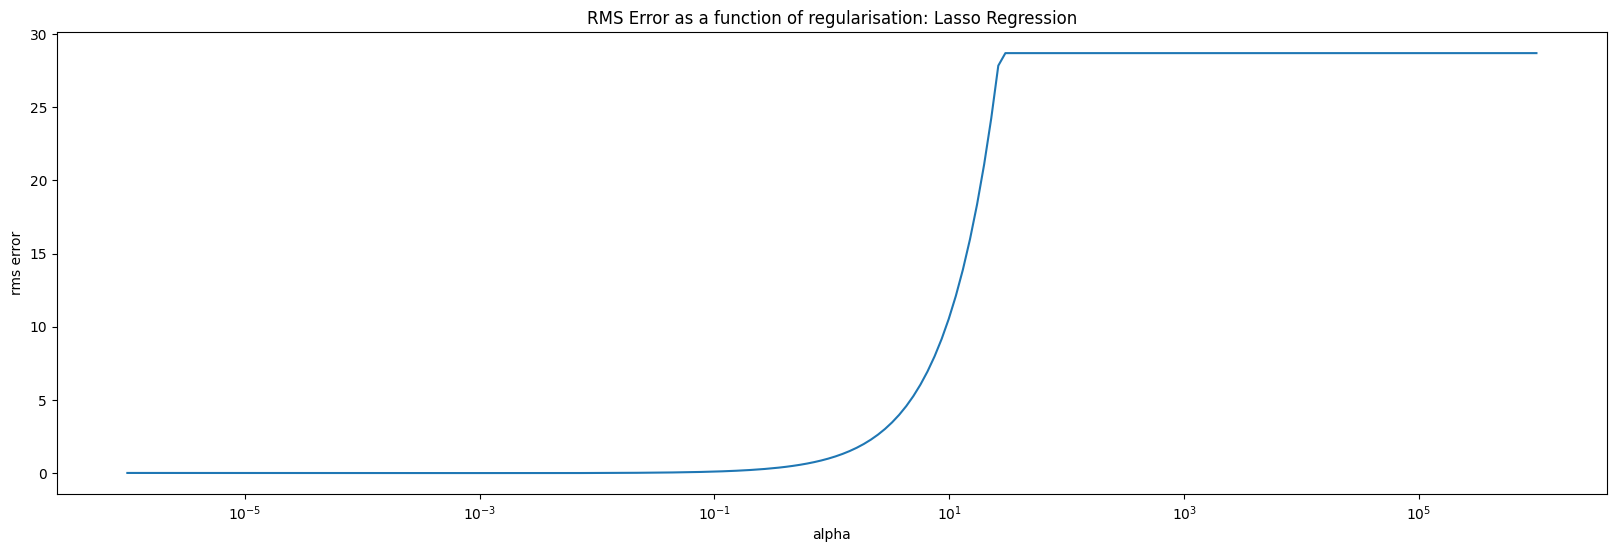

In [17]:
# Finding best regularisation weight for Lasso Regression
lasso = linear_model.Lasso()

errors = []

alphas = np.logspace(-6, 6, 200)

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(feature_train, target_train)
    errors.append(np.sqrt(mean_squared_error(target_test, lasso.predict(feature_test))))
    
plt.figure(figsize=(20,6))
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("rms error")
plt.axis("tight")
plt.title("RMS Error as a function of regularisation: Lasso Regression")

plt.show()

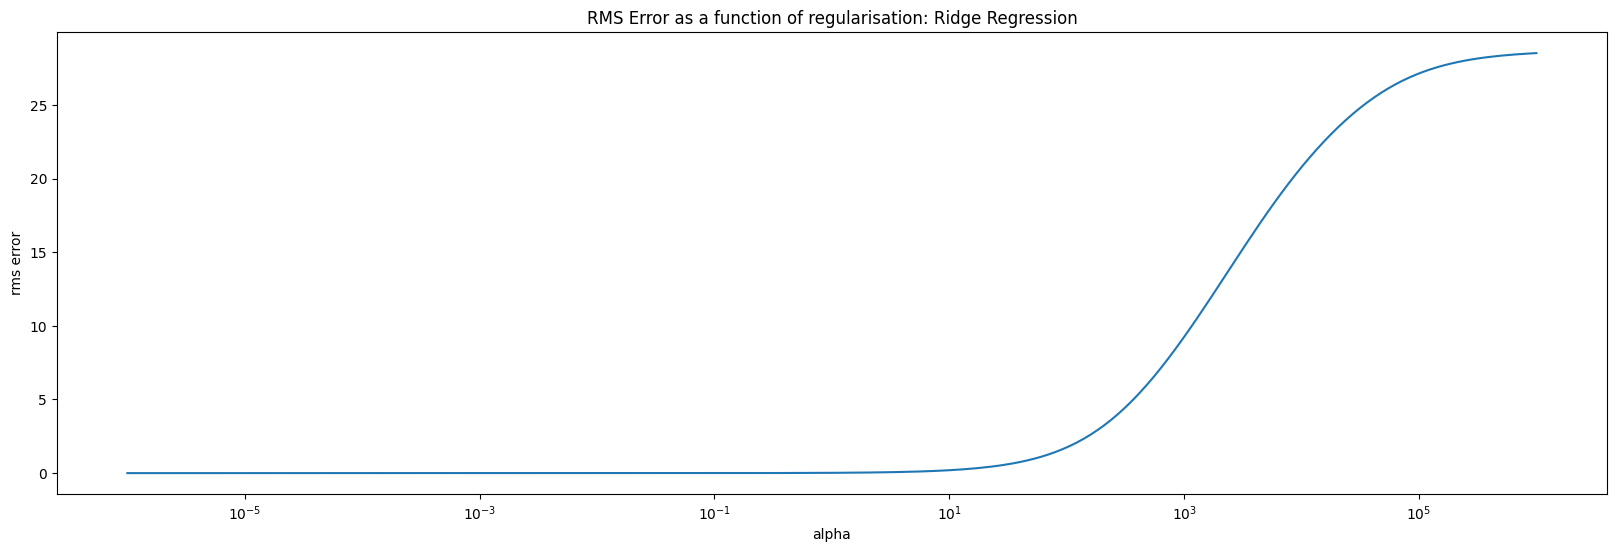

In [18]:
# Finding best regularisation weight for Ridge Regression
ridge = linear_model.Ridge()

errors = []

alphas = np.logspace(-6, 6, 200)

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(feature_train, target_train)
    errors.append(np.sqrt(mean_squared_error(target_test, ridge.predict(feature_test))))
    
plt.figure(figsize=(20,6))
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("rms error")
plt.axis("tight")
plt.title("RMS Error as a function of regularisation: Ridge Regression")

plt.show()

In [19]:
# Perform Cross-Validation
from sklearn.model_selection import cross_val_score

def display_scores(phrase, scores):
    print(phrase)
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())

ols_scores = cross_val_score(lin_reg, features_prepared, targets, scoring="neg_mean_squared_error", cv=10)
ols_rmse_scores = np.sqrt(-ols_scores)

lasso_scores = cross_val_score(lasso_reg, features_prepared, targets, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)

ridge_scores = cross_val_score(ridge_reg, features_prepared, targets, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)

display_scores("\nLinear Regression:\n", ols_rmse_scores)
display_scores("\nLasso Regression:\n", lasso_rmse_scores)
display_scores("\nRidge Regression:\n", ridge_rmse_scores)


Linear Regression:

Scores: [5.95247939e-14 9.10438811e-14 3.07034479e-14 3.03373526e-14
 5.02676623e-14 7.09493620e-14 4.18586980e-14 5.84231023e-14
 3.44010784e-14 3.08744174e-14]
Mean: 4.9838379591028405e-14
Standard deviation: 1.9285560433133464e-14

Lasso Regression:

Scores: [0.09667447 0.10430111 0.09611232 0.10601071 0.09162375 0.1098783
 0.10489215 0.10888694 0.08547556 0.09559435]
Mean: 0.09994496674547282
Standard deviation: 0.007627538823623934

Ridge Regression:

Scores: [0.00185023 0.00203605 0.00192082 0.00176035 0.00179437 0.00186782
 0.00184976 0.00201424 0.00161967 0.00193761]
Mean: 0.0018650900652962682
Standard deviation: 0.00011683501263532053


# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [ ]:
## Read in the provided example test data
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions